# Prosper Loan Data Exploration

### Preliminary Wrangling


This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# importing all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import requests
import os
import seaborn as sb
import time
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#load in the dataset into a pandas dataframe, print statistics
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
# few rows in dataset
loans.head()


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# number of rows and columns in the dataset
loans.shape

(113937, 81)

In [5]:
# statistics of data
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
# basic information about data
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [7]:
#unique values in the dataset
loans.nunique()

ListingKey                     113066
ListingNumber                  113066
ListingCreationDate            113064
CreditGrade                         8
Term                                3
                                ...  
PercentFunded                     719
Recommendations                    17
InvestmentFromFriendsCount         14
InvestmentFromFriendsAmount       726
Investors                         751
Length: 81, dtype: int64

### Data Assesing and cleaning is done:

This is done by selecting a subset of the data for which analysis will be done. Further cleaning the data like removing the null values as well as duplicated values, then changing the variables to the proper data types for visualizations by using convert data types.

In [8]:
# For analysis I use these columns:
analysis_columns =  [
    'Term', 'LoanStatus', 'BorrowerRate','BorrowerAPR', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome','LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors','IsBorrowerHomeowner','MonthlyLoanPayment','DebtToIncomeRatio']


In [9]:
df = loans[analysis_columns]

In [10]:
# examining dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerRate                 113937 non-null float64
BorrowerAPR                  113912 non-null float64
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    113937 non-null int64
EmploymentStatus             111682 non-null object
DelinquenciesLast7Years      112947 non-null float64
StatedMonthlyIncome          113937 non-null float64
LoanOriginalAmount           113937 non-null int64
LoanOriginationDate          113937 non-null object
Recommendations              113937 non-null int64
Investors                    113937 non-null int64
IsBorrowerHomeowner          113937 non-null bool
MonthlyLoanPayment           113937 non-null float64
DebtToIncomeRatio            105383 non-null float64
dtypes: bool(1), float64(6), int64(5), object(4)
memory usa

In [11]:
# basic statistics
df.describe()

,Term,BorrowerRate,BorrowerAPR,ListingCategory (numeric),DelinquenciesLast7Years,StatedMonthlyIncome,LoanOriginalAmount,Recommendations,Investors,MonthlyLoanPayment,DebtToIncomeRatio
count,113937.000000,113937.000000,113912.000000,113937.000000,112947.000000,1.139370e+05,113937.00000,113937.000000,113937.000000,113937.000000,105383.000000
mean,40.830248,0.192764,0.218828,2.774209,4.154984,5.608026e+03,8337.01385,0.048027,80.475228,272.475783,0.275947
std,10.436212,0.074818,0.080364,3.996797,10.160216,7.478497e+03,6245.80058,0.332353,103.239020,192.697812,0.551759
min,12.000000,0.000000,0.006530,0.000000,0.000000,0.000000e+00,1000.00000,0.000000,1.000000,0.000000,0.000000
25%,36.000000,0.134000,0.156290,1.000000,0.000000,3.200333e+03,4000.00000,0.000000,2.000000,131.620000,0.140000
50%,36.000000,0.184000,0.209760,1.000000,0.000000,4.666667e+03,6500.00000,0.000000,44.000000,217.740000,0.220000
75%,36.000000,0.250000,0.283810,3.000000,3.000000,6.825000e+03,12000.00000,0.000000,115.000000,371.580000,0.320000
max,60.000000,0.497500,0.512290,20.000000,99.000000,1.750003e+06,35000.00000,39.000000,1189.000000,2251.510000,10.010000


In [12]:
# duplicated values in dataset
sum(df.duplicated())

872

In [13]:
# deleting duplicated values from the dataset
df.drop_duplicates(subset=None, keep='first', inplace=True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
# checking null values in the dataset
df.isnull().sum()

Term                             0
LoanStatus                       0
BorrowerRate                     0
BorrowerAPR                     25
ProsperRating (Alpha)        29084
ListingCategory (numeric)        0
EmploymentStatus              2255
DelinquenciesLast7Years        990
StatedMonthlyIncome              0
LoanOriginalAmount               0
LoanOriginationDate              0
Recommendations                  0
Investors                        0
IsBorrowerHomeowner              0
MonthlyLoanPayment               0
DebtToIncomeRatio             8471
dtype: int64

In [15]:
# deleting null values from the dataset
df = df.dropna()

In [16]:
df.shape

(76768, 16)

The rows and columns now in the dataset are 76768 and 16 respectively.

In [17]:
# datatypes of various columns
df.dtypes

Term                           int64
LoanStatus                    object
BorrowerRate                 float64
BorrowerAPR                  float64
ProsperRating (Alpha)         object
ListingCategory (numeric)      int64
EmploymentStatus              object
DelinquenciesLast7Years      float64
StatedMonthlyIncome          float64
LoanOriginalAmount             int64
LoanOriginationDate           object
Recommendations                int64
Investors                      int64
IsBorrowerHomeowner             bool
MonthlyLoanPayment           float64
DebtToIncomeRatio            float64
dtype: object

In [18]:
# converting the column names into lower case for easy analysis process
df.columns = map(str.lower, df.columns)

In [19]:
# converting to category datatype for analysis
df['term'] = df['term'].astype('category')

In [20]:
# converting date to proper date time format
df['loanoriginationdate'] = pd.to_datetime(df['loanoriginationdate'])

In [21]:
# renaming columns 
df.rename(columns={'prosperrating (alpha)': 'prosperrating_alpha_', 
                        'debttoincomeratio': 'debt_to_income_ratio',
                        'listingcategory (numeric)' : 'listingcategory_numeric_',
                   'loanoriginationdate': 'loan_origination_date'
                       }, inplace=True)

In [22]:
# checking the names of columns
df.sample(1)

,term,loanstatus,borrowerrate,borrowerapr,prosperrating_alpha_,listingcategory_numeric_,employmentstatus,delinquencieslast7years,statedmonthlyincome,loanoriginalamount,loan_origination_date,recommendations,investors,isborrowerhomeowner,monthlyloanpayment,debt_to_income_ratio
111526,36,Current,0.184,0.22108,C,1,Employed,0.0,7666.666667,15000,2013-12-20,0,1,True,545.3,0.54


In [23]:
# converting into category data type
df['loanstatus'] = df['loanstatus'].astype('category')
df['employmentstatus'] = df['employmentstatus'].astype('category')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76768 entries, 1 to 113936
Data columns (total 16 columns):
term                        76768 non-null category
loanstatus                  76768 non-null category
borrowerrate                76768 non-null float64
borrowerapr                 76768 non-null float64
prosperrating_alpha_        76768 non-null object
listingcategory_numeric_    76768 non-null int64
employmentstatus            76768 non-null category
delinquencieslast7years     76768 non-null float64
statedmonthlyincome         76768 non-null float64
loanoriginalamount          76768 non-null int64
loan_origination_date       76768 non-null datetime64[ns]
recommendations             76768 non-null int64
investors                   76768 non-null int64
isborrowerhomeowner         76768 non-null bool
monthlyloanpayment          76768 non-null float64
debt_to_income_ratio        76768 non-null float64
dtypes: bool(1), category(3), datetime64[ns](1), float64(6), int64(4), objec

Finally, dataset is cleaned and tidy for further process without any duplicated and null values with proper datatypes.

What factors affect a loan’s outcome status? What affects the borrower’s APR or interest rate? Are there differences between loans depending on how large the original loan amount was?

### What is the structure of your dataset?

The rows and columns now in the dataset are 76768 and 16 respectively on which the analysis will be done it includes features like LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, ProsperRating (Alpha), EmploymentStatus and many other variables.

### What is/are the main feature(s) of interest in your dataset?

The main purposes of this project are to summarize the characteristics of  variables that can affect the loan status and to get some ideas about the  relationships among multiple variables using summary statistics and data  visualizations.Further figuring out the  borrower's Annual Percentage Rate (APR) for the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think that loan status will be affected by the monthly income as well as his home status, further prosper rating will also be affecting it.
Regarding the borrower's Annual Percentage Rate (APR) for the loan major affect will be due to Prosper rating as well as employment status.

In [25]:
# assigning colors 
base_color = sb.color_palette()[4]
base_color_1 = sb.color_palette()[7]

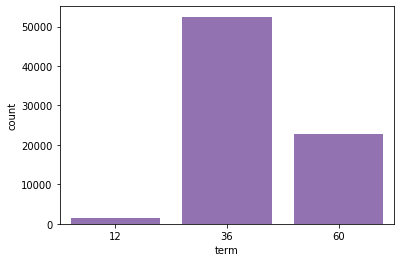

In [26]:
#countplot of term:
sb.countplot(data = df,x = 'term',color = base_color);

Maximum borrowers have taken a loan of 36 months

In [27]:
df.borrowerapr.value_counts()

0.35797    2990
0.35643    1328
0.30532     782
0.29510     647
0.35356     639
           ... 
0.23036       1
0.30917       1
0.24152       1
0.20443       1
0.18875       1
Name: borrowerapr, Length: 2174, dtype: int64

In [28]:
df.borrowerapr.describe()

count    76768.000000
mean         0.223978
std          0.079291
min          0.045830
25%          0.162590
50%          0.215660
75%          0.287800
max          0.423950
Name: borrowerapr, dtype: float64

The BorrowerAPR is the annual cost of a loan to a borrower. Unlike an interest rate, it includes other charges or fees to reflect the total cost of the loan.

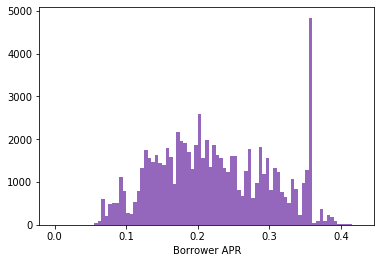

In [29]:
# plotting borrowerapr
bins_edges = np.arange(0, df['borrowerapr'].max()+0.005, 0.005)
plt.hist(data =df, x = 'borrowerapr',bins = bins_edges, color = base_color);
plt.xlabel('Borrower APR');

Here, we can see a sharp peak between 0.3 and 0.4.

In [30]:
df['prosperrating_alpha_'].value_counts()

C     16671
B     14444
A     13555
D     12724
E      8543
HR     5722
AA     5109
Name: prosperrating_alpha_, dtype: int64

In [31]:
# Converting Prosper rating into proper categories as its ordinal type in nature
order_1 = ['HR','E','D','C','B','A','AA']
ordered_variable = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = order_1)
df['prosperrating_alpha_'] = df['prosperrating_alpha_'].astype(ordered_variable)

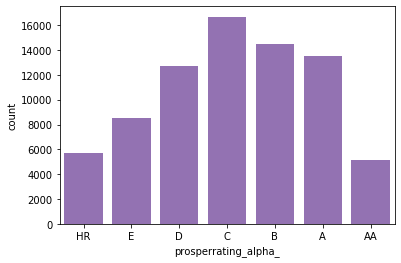

In [32]:
sb.countplot(data = df,x = 'prosperrating_alpha_', color = base_color, order= order_1);

As we depict from the graph it is normally distributed with C being the highest category column.Loans with "AA" category are with less count.

In [33]:
# plotting employment status:
order_2 = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']

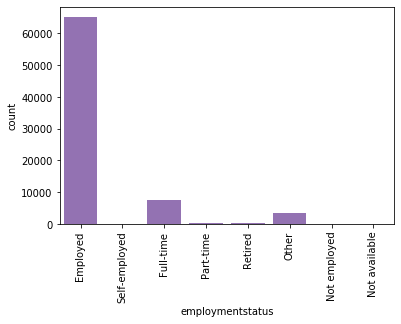

In [34]:
sb.countplot(data = df, x = 'employmentstatus', color = base_color, order = order_2);
plt.xticks(rotation =90);

As we can visualise from the above plot that maximum borrowers are employed.

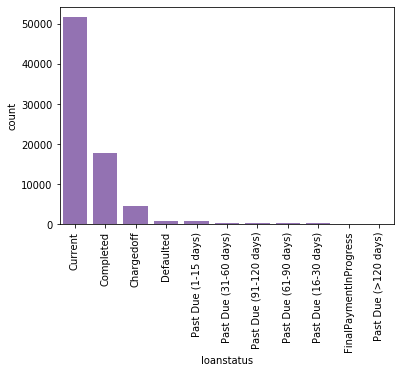

In [35]:
# count plot for loan status
sb.countplot(data = df, x = 'loanstatus', color = base_color, order = df['loanstatus'].value_counts().index);
plt.xticks(rotation = 90);

From the above graph we can depict that maximum are in the status of currently who have taken the loan and some have completed the time period of there loan, further very less are in defaulter and past dues.

In [36]:
df['loanoriginalamount'].describe()

count    76768.000000
mean      9248.961416
std       6389.782292
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      14000.000000
max      35000.000000
Name: loanoriginalamount, dtype: float64

In [37]:
bins_1 = np.arange(1000 , 35000+500 , 500)

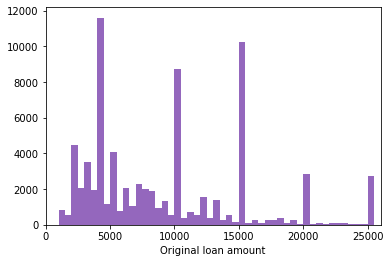

In [38]:
# plotting loan amount and limiting it upto a limit
sb.distplot(df['loanoriginalamount'], bins = bins_1, kde = False, hist_kws = {'alpha': 1},color = base_color);
plt.xlabel('Original loan amount')
plt.xlim(0,26000);

The distribution is interesting and is right skewed with many peaks in between. We can see from the graph that the loan amount count is more for 5000 dollars and 15000 dollars, and then 10000 and least for 25000 dollars.

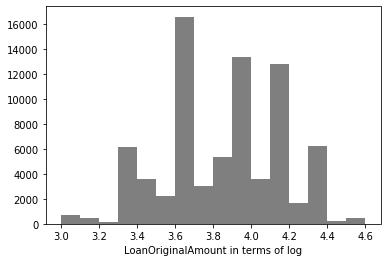

In [39]:
# In terms of log
log_d1 = np.log10(df['loanoriginalamount'])
log_bin = np.arange(3 , log_d1.max()+0.1 , 0.1)
plt.hist(log_d1, bins = log_bin, color= base_color_1)
plt.xlabel('LoanOriginalAmount in terms of log');

In [40]:
df['statedmonthlyincome'].describe()

count     76768.000000
mean       5964.256138
std        5089.682309
min           0.250000
25%        3528.895834
50%        5000.000000
75%        7166.666667
max      483333.333333
Name: statedmonthlyincome, dtype: float64

In [41]:
bins_2 = np.arange(0 , 50000, 500)

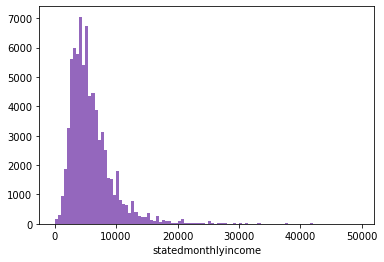

In [42]:
# distribution of stated monthly income:
plt.hist(data = df, x = 'statedmonthlyincome', bins =bins_2, color = base_color);
plt.xlabel('statedmonthlyincome');

The distribution of stated monthly income is severely right screwed, with stated monthly income less than 30000. and peak around 5000. 

In [43]:
sorted_counts = df['isborrowerhomeowner'].value_counts()

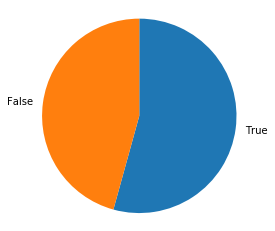

In [44]:
# plotting pie chart for checking is the borrower being a home owner or not
plt.pie(sorted_counts, labels = sorted_counts.index , startangle = 90,
        counterclock = False)
plt.axis('square');

From the chart we can see there is around 55 % borrower who own a home and rest don't have their own house.

In [45]:
t1 = df['debt_to_income_ratio'].value_counts().head(15)

In [46]:
t_order = t1.index

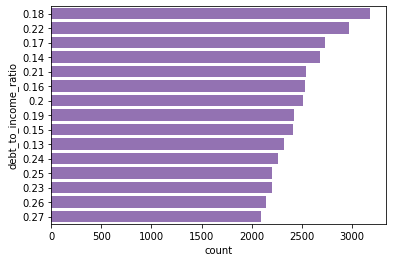

In [47]:
# plotting debt to income ratio
sb.countplot(data = df, y = 'debt_to_income_ratio',color =base_color,order = t_order);

From the above plot we can visualise that maximum borrowers have 0.18 debt to income ratio.

In [48]:
t2 = df['listingcategory_numeric_'].value_counts().head(10)

In [49]:
t2_order = t2.index

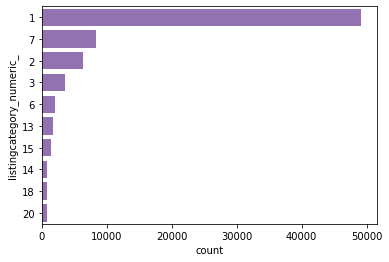

In [50]:
# plotting listing categories:
sb.countplot(data = df, y = 'listingcategory_numeric_',color =base_color,order = t2_order);

ListingCategory is the category of listing. Prosper uses numeric  values to represent the categories.

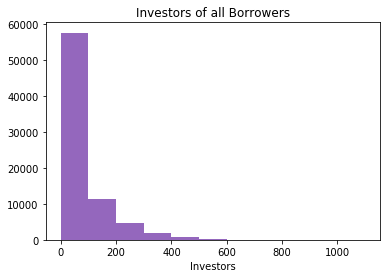

In [51]:
bin_edges = np.arange(0, df['investors'].max()+10, 100)
plt.hist(data =df, x = 'investors', bins = bin_edges, color = base_color)
plt.xlabel('Investors')
plt.title("Investors of all Borrowers");

From the above depictiom we can observe that maximum investors are in range of 0 to 100.

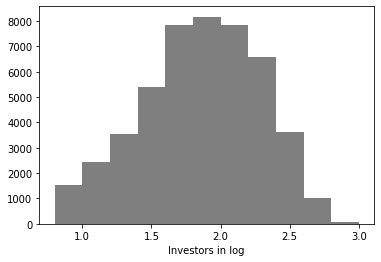

In [52]:
# investors in terms of log
log_d2 = np.log10(df['investors']) # direct data transform
log_bins = np.arange(0.8, log_d2.max()+0.1, 0.2)
plt.hist(log_d2, bins = log_bins , color = base_color_1)
plt.xlabel('Investors in log');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of borrowers APR looks multimodal. Most of the values are at the range of 0.05 and 0.4.
Distribution of monthly stated income is very awkward: with a lot of outliers and very large range of values.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distributions of stated monthly income is highly right screwed. DebtToIncomeRatio is also right skewed.
For monthly income I put a limit and analysez the data upto 26k.
There is no need to perform any change in the form of data.

### Bivariate Exploration:

It is the relationship between two variables:

In [53]:
# data types of various variables:
df.dtypes

term                              category
loanstatus                        category
borrowerrate                       float64
borrowerapr                        float64
prosperrating_alpha_              category
listingcategory_numeric_             int64
employmentstatus                  category
delinquencieslast7years            float64
statedmonthlyincome                float64
loanoriginalamount                   int64
loan_origination_date       datetime64[ns]
recommendations                      int64
investors                            int64
isborrowerhomeowner                   bool
monthlyloanpayment                 float64
debt_to_income_ratio               float64
dtype: object

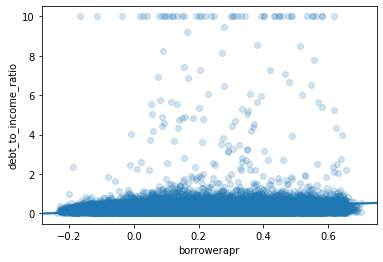

In [54]:
sb.regplot(df['borrowerapr'], df['debt_to_income_ratio'], x_jitter=0.3, scatter_kws={'alpha':1/5});

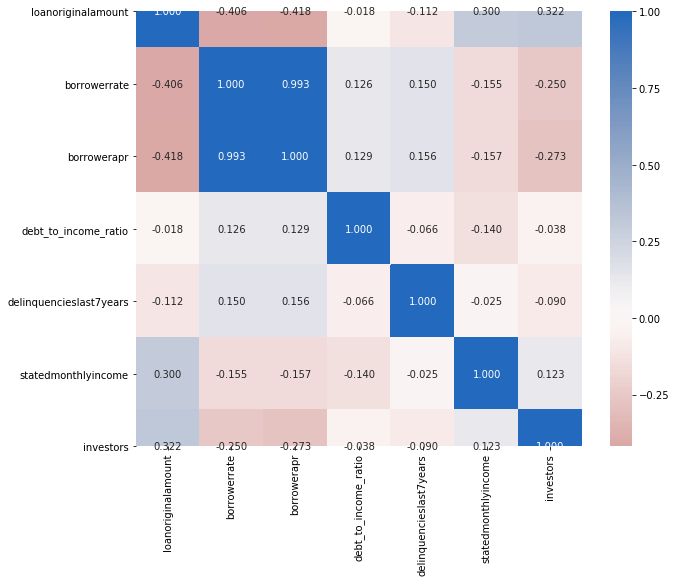

In [55]:
# I want to look at the pairwise correlations present between features in the data
numeric_vars_1 = ['loanoriginalamount','borrowerrate','borrowerapr','debt_to_income_ratio','delinquencieslast7years',
'statedmonthlyincome','investors']
plt.figure(figsize = [10, 8])
sb.heatmap(df[numeric_vars_1].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

The correlation coefficient of borrower APR and loan original amount is -0.41 which states they are negatively correlated.
There is no strong correlation between variables in this data set. There is some moderate positive correlation between loan amount and term, loan amount and number of investors, loan amount and stated monthly income, recommendations and total prosper loans, number of delinquencies and borrowers rate.

In [56]:
order_num = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var_1 = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = order_num)
df['employmentstatus'] = df['employmentstatus'].astype(ordered_var_1)

In [57]:
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories =order_num)

In [58]:
df['employmentstatus'] = df['employmentstatus'].astype(vclasses)

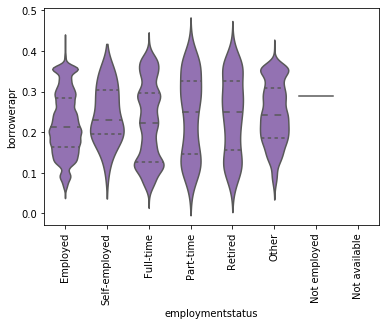

In [59]:
sb.violinplot(data =df, x = 'employmentstatus',y='borrowerapr', inner = 'quartile',color = base_color)
plt.xticks(rotation = 90);

From the above violin plot we can visualise that employed, self-employed and full time borrowers have similar borrowerAPR range.

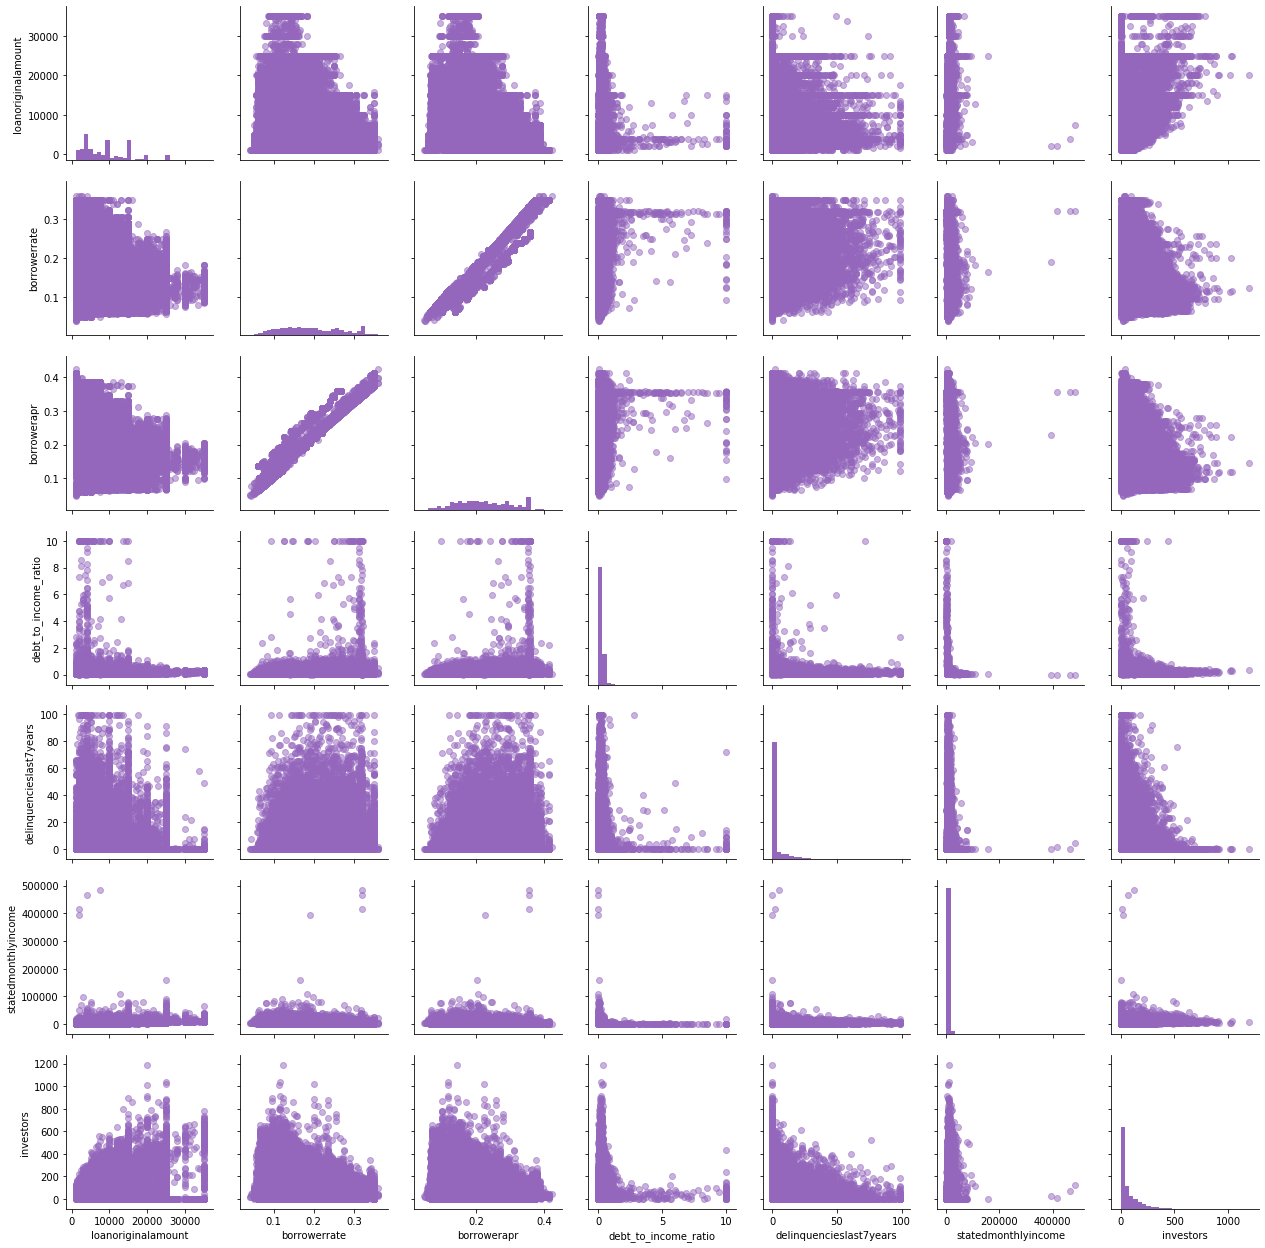

In [60]:
g = sb.PairGrid(data = df, vars = numeric_vars_1)
g = g.map_diag(plt.hist, bins=30,color = base_color)
g.map_offdiag(plt.scatter, alpha=0.5,color=base_color);


<Figure size 720x720 with 0 Axes>

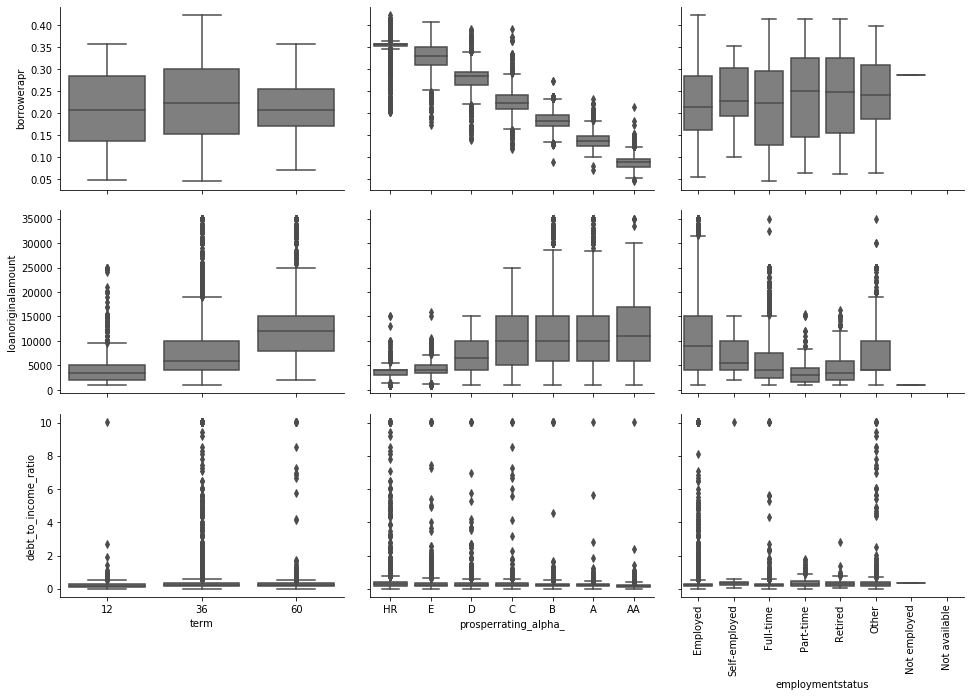

In [72]:
#from lesson of bivariate plots 
def box_grid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    sb.boxplot(x, y, color = base_color_1)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df, y_vars = ['borrowerapr','loanoriginalamount','debt_to_income_ratio'], 
                x_vars = ['term','prosperrating_alpha_','employmentstatus'], height = 3, aspect = 1.5)
plt.xticks(rotation=90);
g.map(box_grid);

Interestingly we can observe thatThe borrower APR decreases with the better rating. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR.

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


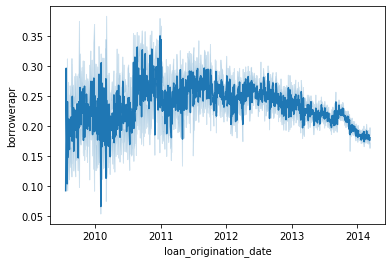

In [62]:
sb.lineplot(data = df, x = 'loan_origination_date', y='borrowerapr',alpha = 1);

From this we can see that in 2014 there is a decrease in the borrower APR.

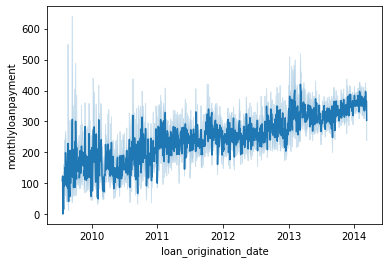

In [63]:
sb.lineplot(data = df, x = 'loan_origination_date', y='monthlyloanpayment',alpha = 1)

As we can depict from the above plot with the increasing number of years that is from 2012 to 2014 the monthly loan payment of borrowers increases.

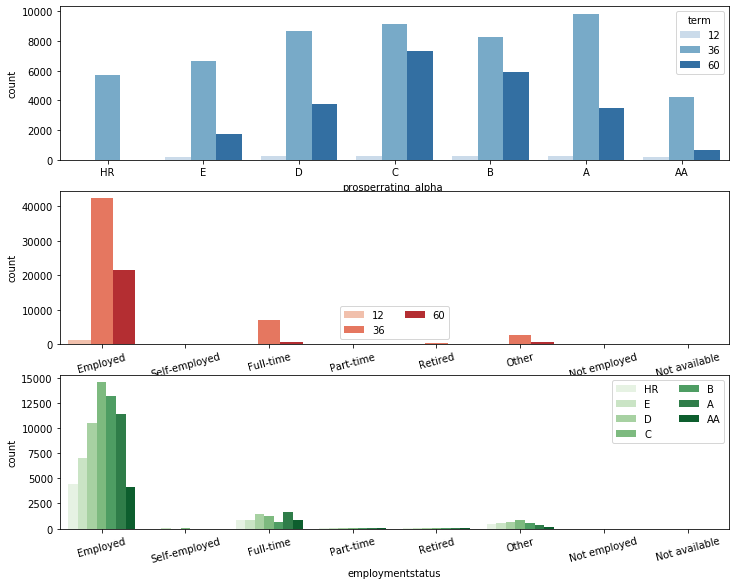

In [64]:
plt.figure(figsize = [12, 13])

# subplot 1: Prosper rating vs term
plt.subplot(4, 1, 1)
sb.countplot(data = df, x = 'prosperrating_alpha_', hue = 'term', palette = 'Blues')

# subplot 2: employment status vs. term
ax = plt.subplot(4, 1, 2)
sb.countplot(data = df, x = 'employmentstatus', hue = 'term', palette = 'Reds')
plt.xticks(rotation = 15)
ax.legend(ncol = 2)


# subplot 3: Prosper rating vs. employment status
ax = plt.subplot(4, 1, 3)
sb.countplot(data = df, x ='employmentstatus', hue = 'prosperrating_alpha_', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation = 15);

Through the observations of the above plot we can say that prosper rating 'C' has maximum number of loans of 60 months term, further we can observe that over 9000 borrowers of 'A' category have 36 months of loan.

From the second plot we can depict that Maximum borrowers who are employed hav taken loans of 36 as well as 60 months.

From the third plot we observe that employed category people maximum of them belong to either 'C' or 'B' prosper rating. 

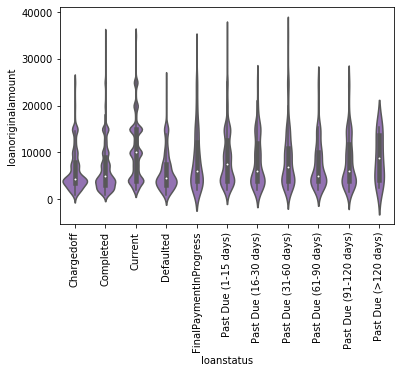

In [73]:
sb.violinplot(data = df, x = 'loanstatus', y = 'loanoriginalamount', color = base_color)
plt.xticks(rotation = 90);

From this plot we can easily predict that borrowers who have past dues have taken a larger loan amount, furter less of people who have a status of charged off.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Loan original amount and monthly loan payment is highly correlated and it is expected and borrowers interest rate and proper score are highly negatively correlated, Borrower APR and loanamount are negatively correlated. LoanOriginalAmount is highest for A and B Prosper ratings.
Further, we can state that Prosper rating also has a effect on borrower APR.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The loan original amount is positively correlated with the stated monthly income.Maximum borrowers who are employed hav taken loans of 36 as well as 60 months. prosper rating 'C' has maximum number of loans of 60 months term, further we can observe that over 9000 borrowers of 'A' category have 36 months of loan. The increasing number of years that is from 2012 to 2014 the monthly loan payment of borrowers increases.

### Multivariate Exploration

Depicting the relationship among three or more variables.

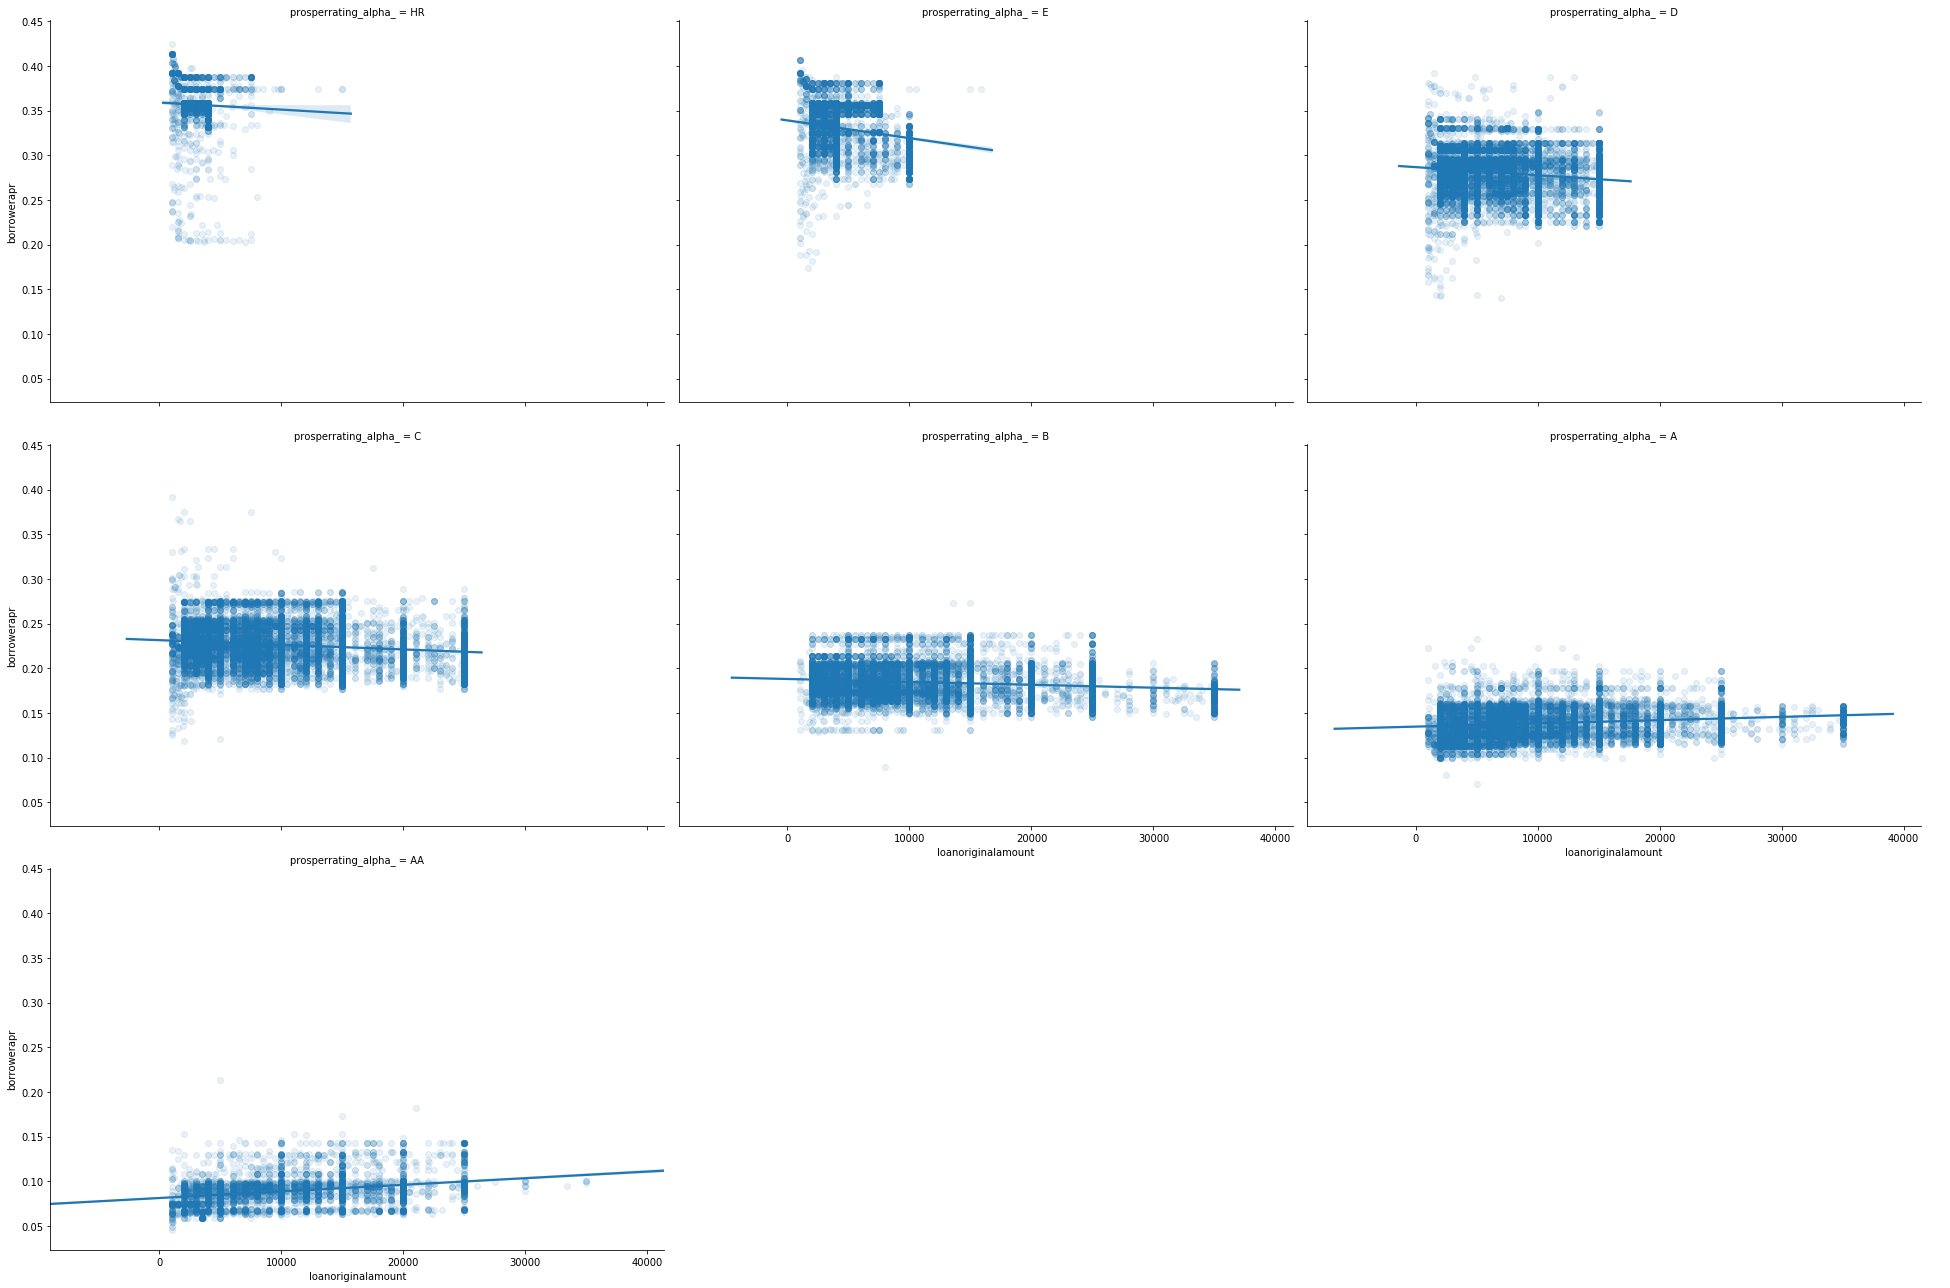

In [74]:
g=sb.FacetGrid(data=df,aspect = 1.5, col='prosperrating_alpha_',height =6, col_wrap=3)
g.map(sb.regplot, 'loanoriginalamount', 'borrowerapr', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

From the plots we can observe that borrower apr and loan amount are changed from negative to positive when ratings are increased from HR to category A.
We can say that people with low ratings generally borrow less money , further can say that borrow APR when decreased can lead to make the borrowers to borrow more.

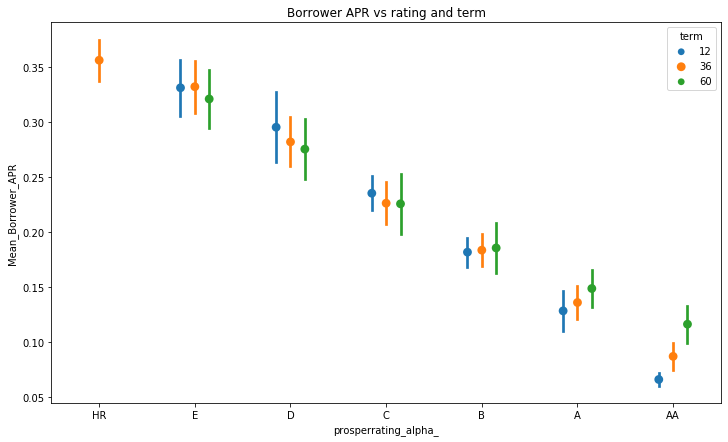

In [75]:
plt.figure(figsize = [12, 7])
ax = sb.pointplot(data = df, x = 'prosperrating_alpha_', y = 'borrowerapr', hue = 'term',dodge = 0.3, linestyles = "",ci ='sd')
plt.title('Borrower APR vs rating and term')
plt.ylabel('Mean_Borrower_APR');

From the above visualization we can observe that for HR there is only 36 month loans witha mean borrower apr as 0.35, further it increases and is maximum for the AA category around 0.10

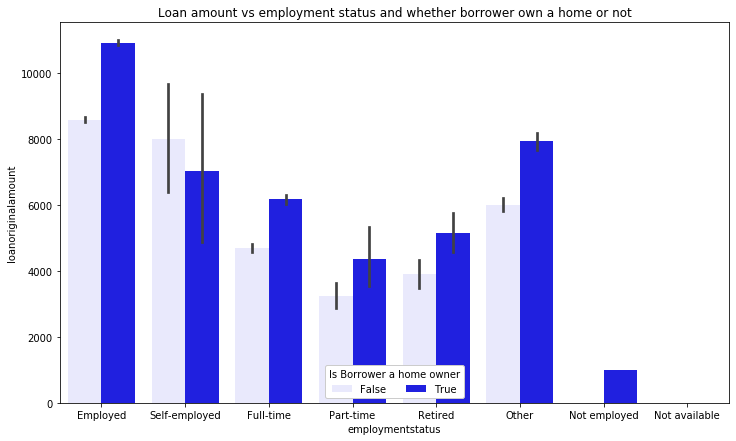

In [82]:
plt.figure(figsize = [12, 7])
ax = sb.barplot(data =df, x= 'employmentstatus' , y= 'loanoriginalamount', hue = 'isborrowerhomeowner', color = 'b')
ax.legend(loc =8,ncol =3 , framealpha =1, title = 'Is Borrower a home owner')
plt.title('Loan amount vs employment status and whether borrower own a home or not');

From the above bar plot we can depict that for the employed people have taken the loan and the loan amount is greater than 8000 dollars, and many of them own there own home.
Further, depicting and visualization of the graph we can say that people of employemnt status who are self employed have taken the loan in amount of 6000 dollars and 8000 dollars, and full time status people taking a loan in range 4000 to 6000 dollars. The people who own there own house are mainly from employed, self employes as well as full-time employed.

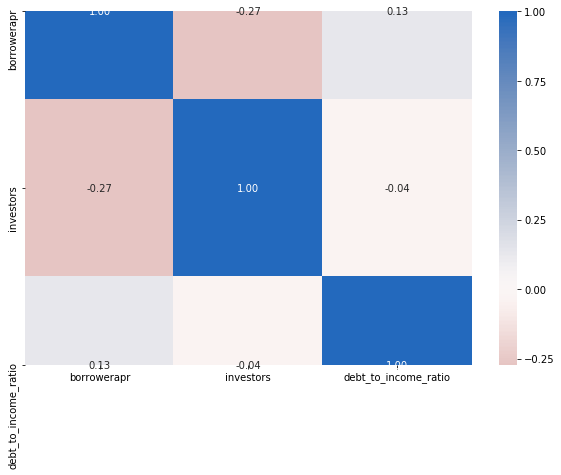

In [83]:
columns_2 =['borrowerapr','investors','debt_to_income_ratio']
df_1 = df[columns_2]
plt.figure(figsize = [10, 6.5])
sb.heatmap(df_1.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

Interestingly from the above heat map we can depict that Borrower APR and investors are negatively correlated having a correlation of -0.27 having a weak relationship.
Secondly we can observe that borrower APR and debt to income ratio are positively correlated having a correlation of 0.13(weakly related)

<Figure size 720x468 with 0 Axes>

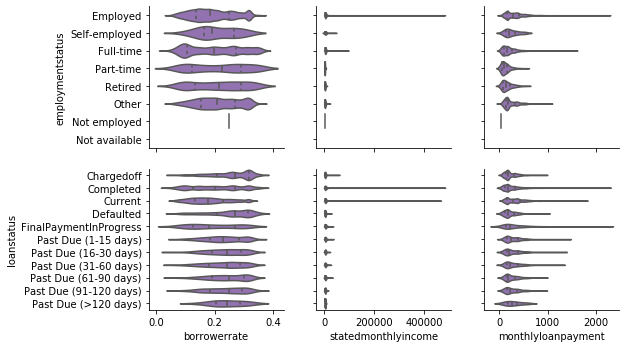

In [87]:
plt.figure(figsize = [10, 6.5])
g = sb.PairGrid(data = df, x_vars = ['borrowerrate', 'statedmonthlyincome', 'monthlyloanpayment'],
                y_vars = ['employmentstatus','loanstatus'])
g.map(sb.violinplot, inner = 'quartile', color = base_color);

From the above plot we can depict that for employed, self employed and full time borrower rarte is around 0.2.
Further we can observe that borrowers who are employed and full - time have a monthly income in the range of 10000 to 20000 above that are outliers. Other categories like self employed, part time employees have a very less monthly income.
Secondly we can depict that people who are employed and full-time pay high monthly loans than other people.

When we compare loan status with borrow rate we observe that defaulted have a high borrow rate as compared to people who are in state of current loan.
Further after observing the plots we can say that those borrowers who are in completed or Current loan status have a high stated monthly income with outliers in income.Finally, we can conclude that people who have completed or there final payment is in progress pay high monthly loan followed by people who are currently in loan status.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of borrower APR in this section by looking at the impact of the categorical quality features. The multivariate exploration here showed that there indeed is a positive effect of debt to quality ratio to the borrower APR.The relationship of borrower APR and loan amount turns slightly positive when we visualised that prosper ratings are minimum for HR and goes to maximum for AA.

### Were there any interesting or surprising interactions between features?

Interestingly , I found out that the monthly income of borrowers are having higher values for employed, other and full time employment status with the prosper rating of AA and A category. People who have their own homes tends to have low rate of interest and have a higher rating bringing up the safest side for giving them the loan.


At the end I would conclude that Borrower APR highly negatively correlated with variables, further we can say that loan status of a borrower is also dependent on its employment status, stated monthly income as well as he has his own house or not futher even on his monthly loan payment.
Eventually if he has higher monthly income loan can be easliy paid by making high loan payment. 